In [35]:
# Importation des bibliothèques essentielles
import numpy as np
import pandas as pd

# Importation des bibliothèques essentielles pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importation des bibliothèques pour le traitement de texte
import re  # utilisé pour la correspondance de motifs et la manipulation de texte.
import string 
import nltk
nltk.download('stopwords') # une bibliothèque puissante pour travailler avec des données en langage humain.
nltk.download('punkt') # Pour le tokeniseur de mots
nltk.download('wordnet') # Pour le modèle de lemmatisation (optionnel)
from nltk.corpus import stopwords # pour le nettoyage 
from nltk.stem import LancasterStemmer ## pour le nettoyage 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
df=pd.read_csv('train_data.txt', delimiter=':::', names=['id','title','genre', 'description'], engine='python')

In [37]:
#exploring dataset
df.columns

Index(['id', 'title', 'genre', 'description'], dtype='object')

In [38]:
#la taille du dataset
df.shape

(54214, 4)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [40]:
df.head(10)

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [41]:
# counting genres
genres = df['genre'].unique().tolist()
genres

[' drama ',
 ' thriller ',
 ' adult ',
 ' documentary ',
 ' comedy ',
 ' crime ',
 ' reality-tv ',
 ' horror ',
 ' sport ',
 ' animation ',
 ' action ',
 ' fantasy ',
 ' short ',
 ' sci-fi ',
 ' music ',
 ' adventure ',
 ' talk-show ',
 ' western ',
 ' family ',
 ' mystery ',
 ' history ',
 ' news ',
 ' biography ',
 ' romance ',
 ' game-show ',
 ' musical ',
 ' war ']

In [42]:
len(genres)

27

C:\Users\Dell\AppData\Local\Temp\ipykernel_6892\1692982842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df,palette='rainbow',edgecolor=(0,0,0))


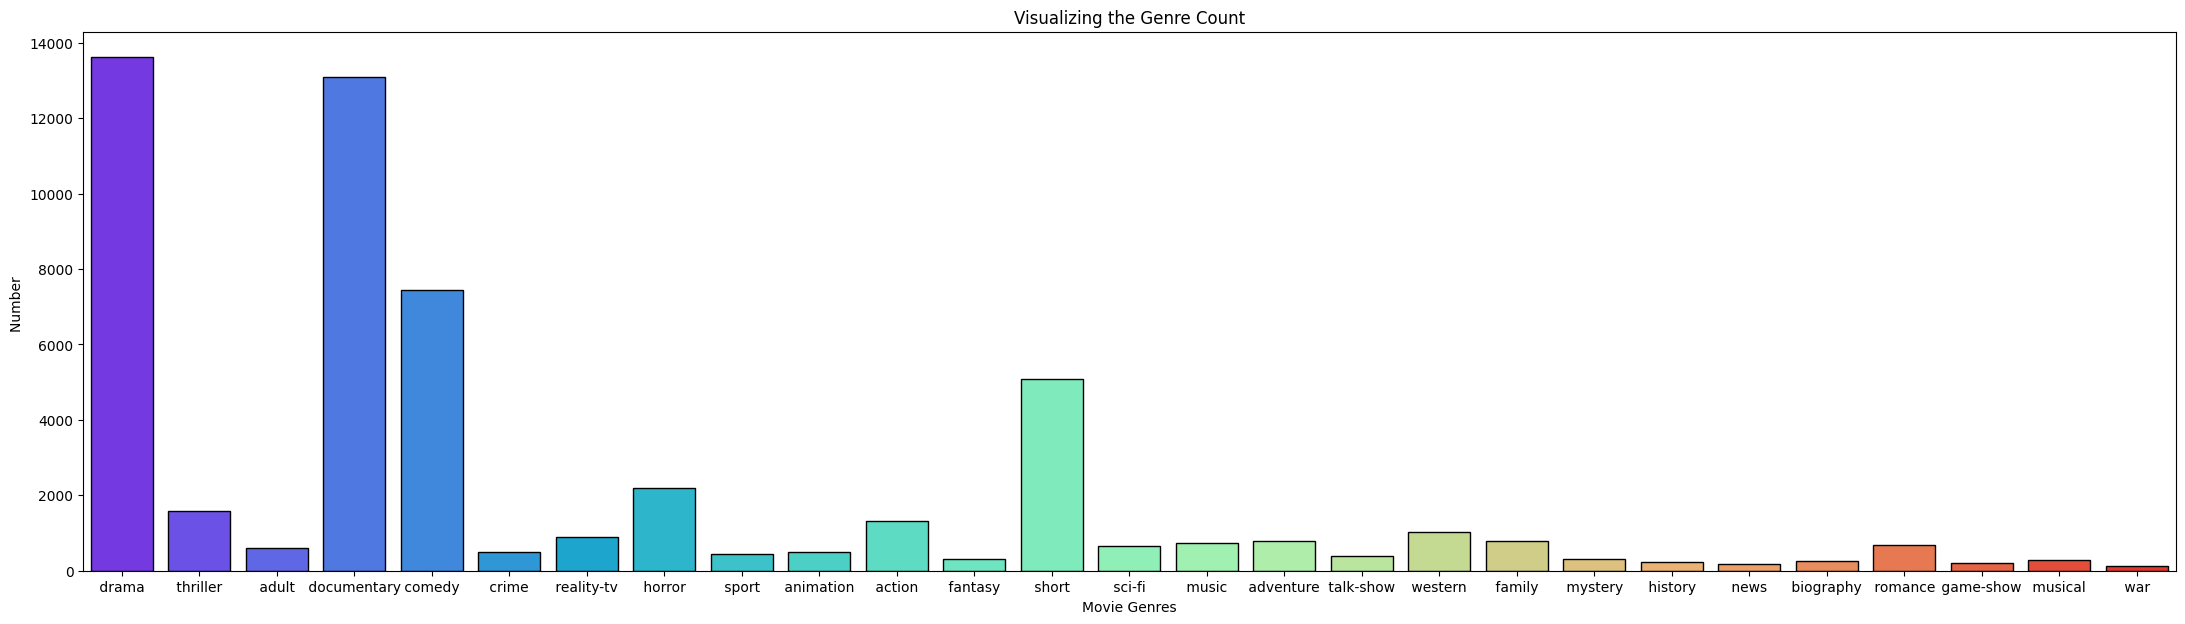

In [43]:
plt.figure(figsize=(27,7))
sns.countplot(x='genre', data=df,palette='rainbow',edgecolor=(0,0,0))
plt.xlabel('Movie Genres')
plt.ylabel('Number ')
plt.title('Visualizing the Genre Count')
plt.show()

In [44]:
df.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [45]:
test=pd.read_csv('test_data.txt', delimiter=':::', names=['id','title','description'], engine='python')

In [46]:
test.shape

(54200, 3)

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [48]:
test.head(5)

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [49]:
#Le prétraitement du données d'entrainement et de test
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

df["TextCleaning"] = df["description"].apply(cleaning_data)
test["TextCleaning"] = test["description"].apply(cleaning_data)

In [50]:
df

,id,title,genre,description,TextCleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
#Using TF-IDF to vectorize data
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(df["TextCleaning"])

X_test = vectorize.transform(test["TextCleaning"])

In [53]:
from sklearn.model_selection import train_test_split 

In [54]:
#Splitting data to train data and test data
X = X_train
y = df["genre"]

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size= 0.2, random_state=42)

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [56]:
# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

In [57]:
# Make predictions on the test dataset
y_pred = classifier.predict(X_val)

In [58]:
# Evaluate the performance of the model
accuracy = accuracy_score(Y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(Y_val, y_pred))

Validation Accuracy: 0.4460942543576501
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.62      0.04      0.08      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
test['Predicted_Genre'] = X_test_predictions

In [61]:
# Save the test_data DataFrame with predicted genres to a CSV file
test.to_csv('Genres_prediction.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
test

,id,title,description,TextCleaning,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama
...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...,drama
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...,drama
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...,drama
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...,drama
